**Alunos: 
Jefferson Costa, 
Sávio Berdine, 
Amanda Lasserre,
Kevin Andrews,
Nicholas Henrique.**

In [1]:
#-*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize

In [2]:
data = pd.read_csv("College.csv")
#No dataSet original, temos colunas com os nomes separados com um ".", por exemplo, Grad.Rate, e isso estava nos dando alguns problemas, então resolvemos renomear as colunas e trocar esse "." por um "_"
data = data.rename(columns={'Unnamed: 0':'College name','F.Undergrad':'F_Undergrad','P.Undergrad':'P_Undergrad','Room.Board':'Room_Board','S.F.Ratio':'S_F_Ratio','perc.alumni':'perc_alumni','Grad.Rate':'Grad_Rate'})
data.head()

,College name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Os dados que serão utilizados**<br>
    **Private** A factor with levels No and Yes indicating private or public university     
    **Apps** Number of applications received     
    **Accept** Number of applications accepted     
    **Enroll Number** of new students enrolled     
    **Top10perc** Pct. new students from top 10% of H.S. class     
    **Top25perc** Pct. new students from top 25% of H.S. class     
    **F_Undergrad** Number of fulltime undergraduates     
    **P_Undergrad** Number of parttime undergraduates     
    **Outstate** Out-of-state tuition     
    **Room_Board** Room and board costs     
    **Books** Estimated book costs     
    **Personal** Estimated personal spending     
    **PhD Pct.** of faculty with Ph.D.’s     
    **Terminal Pct.** of faculty with terminal degree     
    **S_F_Ratio** Student/faculty ratio     
    **perc_alumni** Pct. alumni who donate     
    **Expend Instructional** expenditure per student     
    **Grad_Rate** Graduation rate<br>
**Observe que temos 18 variáveis**

### **Explorando o banco de dados**

**Uma comparação entre o número de estudantes "fulltime" e "parttime" de universidade privadas e universidades públicas.**

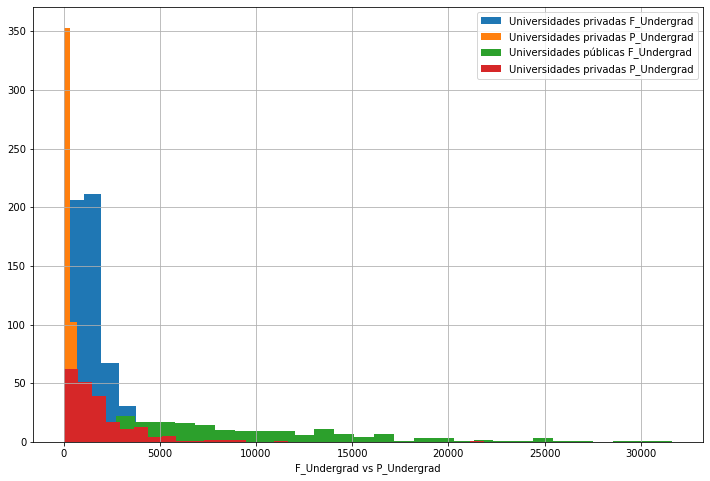

In [3]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'F_Undergrad'].hist(label="Universidades privadas F_Undergrad", bins=30)
data.loc[data.Private == 'Yes', 'P_Undergrad'].hist(label="Universidades privadas P_Undergrad", bins=30)
data.loc[data.Private == 'No', 'F_Undergrad'].hist(label="Universidades públicas F_Undergrad", bins=30)
data.loc[data.Private == 'No', 'P_Undergrad'].hist(label="Universidades privadas P_Undergrad", bins=30)

plt.xlabel('F_Undergrad vs P_Undergrad')
plt.legend()


In [4]:
result = data['Private'].value_counts()
print(result)

Yes    565
No     212
Name: Private, dtype: int64


**Uma comparação entre a taxa de graduação em universidades privadas e universidades públicas**

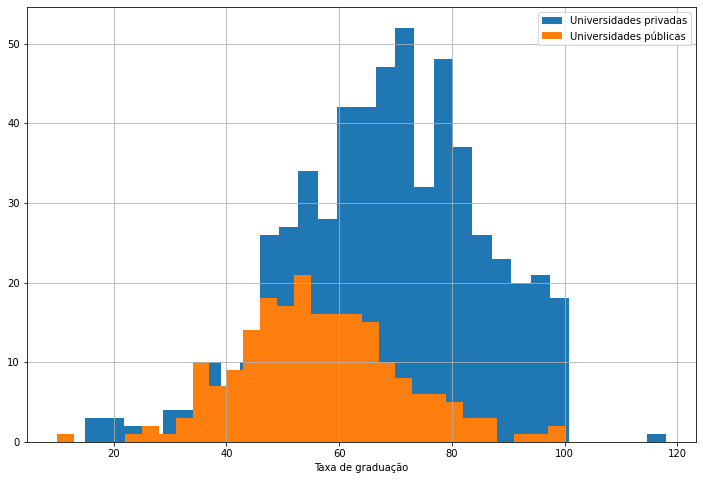

In [5]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'Grad_Rate'].hist(label="Universidades privadas", bins=30)
data.loc[data.Private == 'No', 'Grad_Rate'].hist(label="Universidades públicas", bins=30)

plt.xlabel('Taxa de graduação')
plt.legend()

Ao analisar o histograma, percebemos que tem uma universidade com uma taxa de graduação acima de 100%. Temos que saber qual é essa universidade e "setar" que a taxa de graduação é de 100%, pois isso faz mais sentido para nossa análise.


In [6]:
data.loc[data.Grad_Rate > 100]

,College name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Ao fazer a busca, temos que a *Cazenovia College* é a universidade pela qual estamos procurando, então iremos 'setar' a taxa de graduação dela pra 100%.


In [7]:
data.loc[data.Grad_Rate > 100, 'Grad_Rate'] = 100

**E agora faremos a comparação novamente**

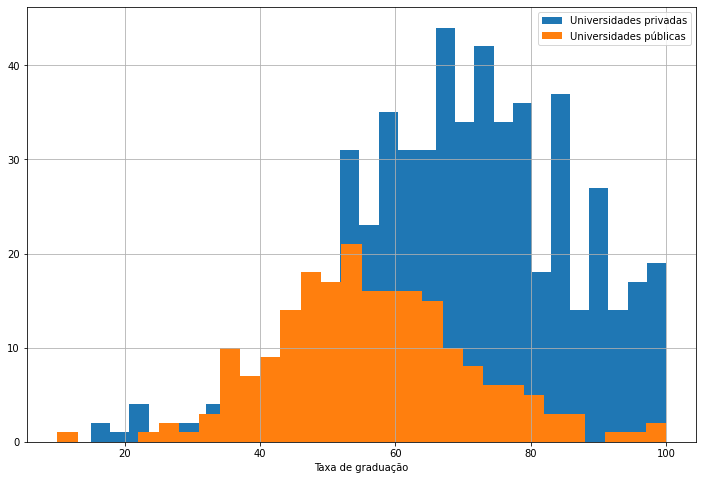

In [8]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'Grad_Rate'].hist(label="Universidades privadas", bins=30)
data.loc[data.Private == 'No', 'Grad_Rate'].hist(label="Universidades públicas", bins=30)

plt.xlabel('Taxa de graduação')
plt.legend()

In [9]:
#selecionando apenas as colunas com valores numéricos
X = data.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values

In [10]:
#criando uma instância do k-means com k = 2
kmeans = KMeans(n_clusters = 2)
#ajustando o k-means
y_kmeans = kmeans.fit_predict(X)

In [11]:
#Transformando a coluna em 1 pra sim e 0 pra não
data['Private'] = data.Private.astype("category").cat.codes

In [12]:
print(classification_report(data.Private, y_kmeans))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



# Data Normalize

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import Normalizer
norm = Normalizer()

In [14]:
y = data.Private.values
X = data.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = norm.fit_transform(X_train)
X_test  = norm.transform(X_test)

In [16]:
models  = []
inertia = []
arss    = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_test)
    ars = adjusted_rand_score(y_test, y_pred)
    amis = adjusted_mutual_info_score(y_test, y_pred)
    
    models.append(kmeans)
    inertia.append(kmeans.inertia_)
    arss.append(ars)
    print(f"{k= }, Ajd Rand Score= {ars:0.3f}, Adj Mutual Info Score= {amis:0.3f}, inertia={kmeans.inertia_:0.2f}")

k= 1, Ajd Rand Score= 0.000, Adj Mutual Info Score= 0.000, inertia=68.03
k= 2, Ajd Rand Score= 0.597, Adj Mutual Info Score= 0.458, inertia=27.86
k= 3, Ajd Rand Score= 0.459, Adj Mutual Info Score= 0.380, inertia=22.93
k= 4, Ajd Rand Score= 0.448, Adj Mutual Info Score= 0.367, inertia=19.28
k= 5, Ajd Rand Score= 0.373, Adj Mutual Info Score= 0.321, inertia=17.45
k= 6, Ajd Rand Score= 0.281, Adj Mutual Info Score= 0.306, inertia=16.01
k= 7, Ajd Rand Score= 0.229, Adj Mutual Info Score= 0.270, inertia=14.69
k= 8, Ajd Rand Score= 0.228, Adj Mutual Info Score= 0.297, inertia=13.85
k= 9, Ajd Rand Score= 0.152, Adj Mutual Info Score= 0.257, inertia=13.12


Text(0, 0.5, 'Sum of squared distance')

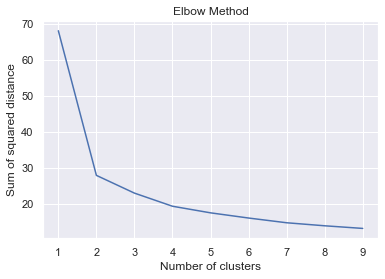

In [17]:
sns.set_theme()

plt.figure()
plt.plot(range(1, 10),inertia)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distance")

# Feature Analysis

In [18]:
X.shape, y.shape

((777, 16), (777,))

In [19]:
data_fa = np.concatenate((X,y[:,None]), axis=1)

In [20]:
df = pd.DataFrame(data_fa)
corr = abs(df.corr())
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,0.090226,0.259592,0.432095
1,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,0.159990,0.124717,0.475252
2,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,0.155477,0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,0.180794,0.064169,0.567908
3,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,0.105356,0.562331,0.371480,0.118858,0.093316,0.531828,0.491135,0.384875,0.455485,0.660913,0.164132
4,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,0.053577,0.489394,0.331490,0.115527,0.080810,0.545862,0.524749,0.294629,0.417864,0.527447,0.095752
5,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,0.215742,0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,0.229462,0.018652,0.615561
6,0.398264,0.441271,0.513069,0.105356,0.053577,0.570512,1.000000,0.253512,0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,0.280792,0.083568,0.452088
7,0.050159,0.025755,0.155477,0.562331,0.489394,0.215742,0.253512,1.000000,0.654256,0.038855,0.299087,0.382982,0.407983,0.554821,0.566262,0.672779,0.552650
8,0.164939,0.090899,0.040232,0.371480,0.331490,0.068890,0.061326,0.654256,1.000000,0.127963,0.199428,0.329202,0.374540,0.362628,0.272363,0.501739,0.340532
9,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,0.031929,0.040208,0.112409,0.018549


In [21]:
threshold = 0.4

In [22]:
new_feat_idx = [idx for idx in range(16) if (corr[16].values[idx] > threshold) ]
print("New number of features: ", len(new_feat_idx), '\n', new_feat_idx)

New number of features:  8 
 [0, 1, 2, 5, 6, 7, 13, 14]


In [23]:
Xf = df[new_feat_idx].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(Xf, y, test_size=0.25, random_state=42)

X_train = norm.fit_transform(X_train)
X_test  = norm.transform(X_test)

In [25]:
models  = []
inertia = []
arss    = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_test)
    ars = adjusted_rand_score(y_test, y_pred)
    amis = adjusted_mutual_info_score(y_test, y_pred)
    
    models.append(kmeans)
    inertia.append(kmeans.inertia_)
    arss.append(ars)
    print(f"{k= }, Ajd Rand Score= {ars:0.3f}, Adj Mutual Info Score= {amis:0.3f}, inertia={kmeans.inertia_:0.2f}")

k= 1, Ajd Rand Score= 0.000, Adj Mutual Info Score= 0.000, inertia=80.47
k= 2, Ajd Rand Score= 0.652, Adj Mutual Info Score= 0.505, inertia=22.67
k= 3, Ajd Rand Score= 0.466, Adj Mutual Info Score= 0.390, inertia=15.22
k= 4, Ajd Rand Score= 0.443, Adj Mutual Info Score= 0.354, inertia=12.63
k= 5, Ajd Rand Score= 0.304, Adj Mutual Info Score= 0.322, inertia=10.80
k= 6, Ajd Rand Score= 0.282, Adj Mutual Info Score= 0.324, inertia=9.26
k= 7, Ajd Rand Score= 0.265, Adj Mutual Info Score= 0.293, inertia=8.17
k= 8, Ajd Rand Score= 0.251, Adj Mutual Info Score= 0.282, inertia=7.53
k= 9, Ajd Rand Score= 0.202, Adj Mutual Info Score= 0.275, inertia=6.89


Text(0, 0.5, 'Sum of squared distance')

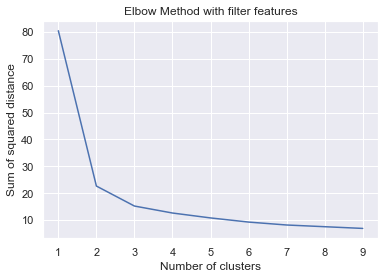

In [26]:
sns.set_theme()

plt.figure()
plt.plot(range(1, 10),inertia)
plt.title("Elbow Method with filter features")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distance")